In [1]:
import os
import glob
import random
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd
import cdplt


# velocity estimation

In [1]:
# import celldancer.velocity_estimation as calc_velocity
import sys
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)
import pandas as pd
import sys
from plotting import gene as cdpl_gene
from plotting import gene as cdpl_cell
from plotting.colormap import *
from celldancer import velocity_estimation

In [2]:
raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv'
load_raw_data=pd.read_csv(raw_path)
gene_choice=["Blvrb","Phc2","Skap1","Nfkb1","Myo1b","Sulf2","Yipf5","Coro2b","Mllt3","Smarca2","Hba-x","Smim1","Snca"]
result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/polish/'
brief, load_cellDancer=velocity_estimation.train(load_raw_data,gene_choice=gene_choice,result_path=None,n_jobs=8)

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/cell_dancer_velocity_2022-04-27 18-00-08 as the output path.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation:   0%|                               | 0/13 [00:00<?, ?it/s]GPU available: False, used: False
GPU available: False, used: False
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
GPU available: False, used: False
IPU available: False, using: 0 IPUs
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
GPU available: False, used: False
IPU available: False, using: 0 IPUs
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Velocity Estimation:   8%|█▊    

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
---------------------------------------------

# Set Parameters

In [2]:
n_neighbors=50 #100
downsample_step=(60,60)

grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

# Load detail

In [3]:
detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

In [4]:
from compute_cell_velocity import compute_cell_velocity



gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              transfer_mode='power10',
              n_neighbors=n_neighbors,
              step=downsample_step)

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(2000, 12329)
(2000, 12329)


/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src/compute_cell_velocity.py:141: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


In [5]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,0.020687,0.043136
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN


# Estimate pseudotime

There are 3 clusters.
They are:  [0 1 2]



cluster  0
MAX allowed zero time cells are:  16
59  Cells left.
Sampling new trajectories for zero-time cells in cluster  0   ...
The closest distance is  0.19281069342518353
Between dot 53  from refPath1 and dot 0 from refPath2.
now the cell time is updated for cluster:  0
shifting ref_path2 by time  53



cluster  0
MAX allowed zero time cells are:  16
Only  1  Cells left. Stopping.



cluster  1
MAX allowed zero time cells are:  10
Only  0  Cells left. Stopping.



cluster  2
MAX allowed zero time cells are:  10
Only  3  Cells left. Stopping.



All intra cluster cell time has been resolved.




Consolidating time between clusters  0  and  1 ..


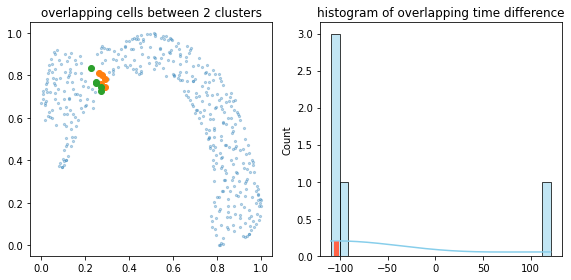

shift time is:  -103 .
The overlapping cells are: 
cell  94  from cluster  0  and  156  from cluster  1

Consolidating time between clusters  0  and  2 ..
No close cells between clusters	 (0, 2)

Consolidating time between clusters  1  and  2 ..
shift time is:  117 .
The overlapping cells are: 
cell  418  from cluster  1  and  256  from cluster  2


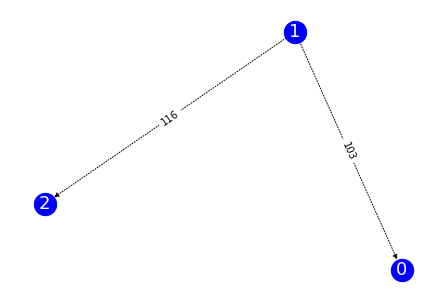

Backward: 0
Forward: 1


All inter cluster cell time has been resolved.



There are 12329 cells.
--- 34.272148847579956 seconds ---


In [6]:
#import importlib
#importlib.reload(sys.modules['pseudo_time'])
from pseudo_time import pseudo_time


cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

In [7]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN,0.083395
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN,0.083395
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,0.020687,0.043136,0.084950
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN,0.277028
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN,0.157050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN,0.486046
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN,0.517145
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN,0.484410
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN,0.482773


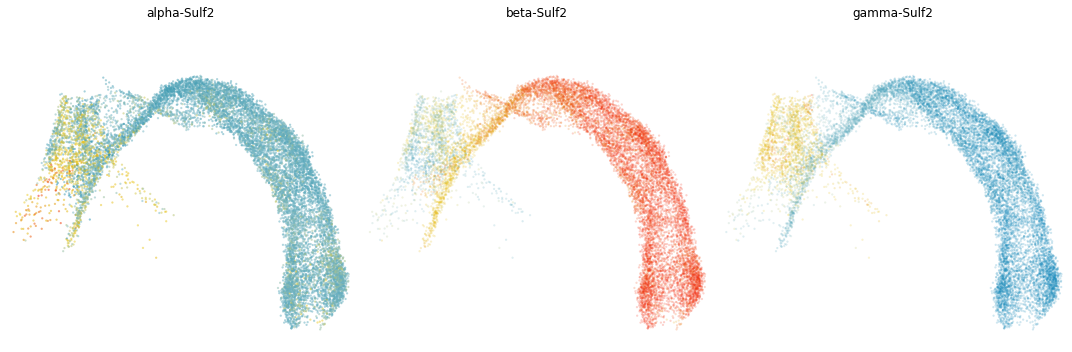

In [8]:
import cdplt
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Sulf2'
cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=(-5,11), custom_ylim=(4,18))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

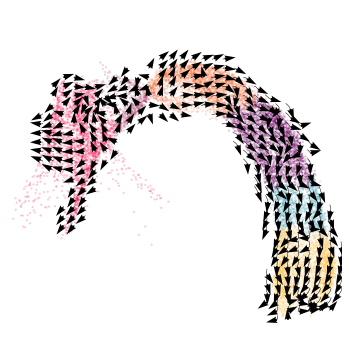

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=clusters, alpha=0.2, 
             gene_name=gene, velocity=True, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

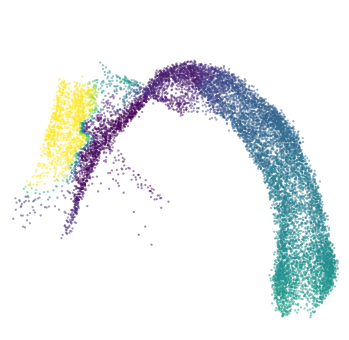

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

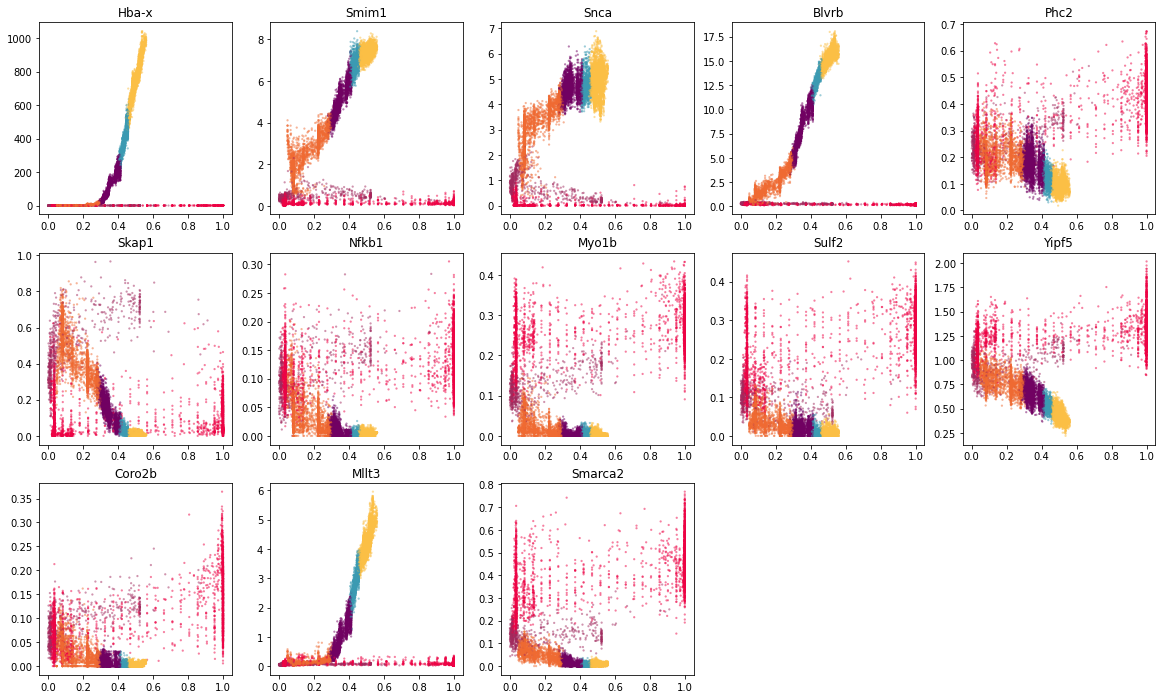

In [11]:
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']
import math
ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=clusters,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
plt.show()

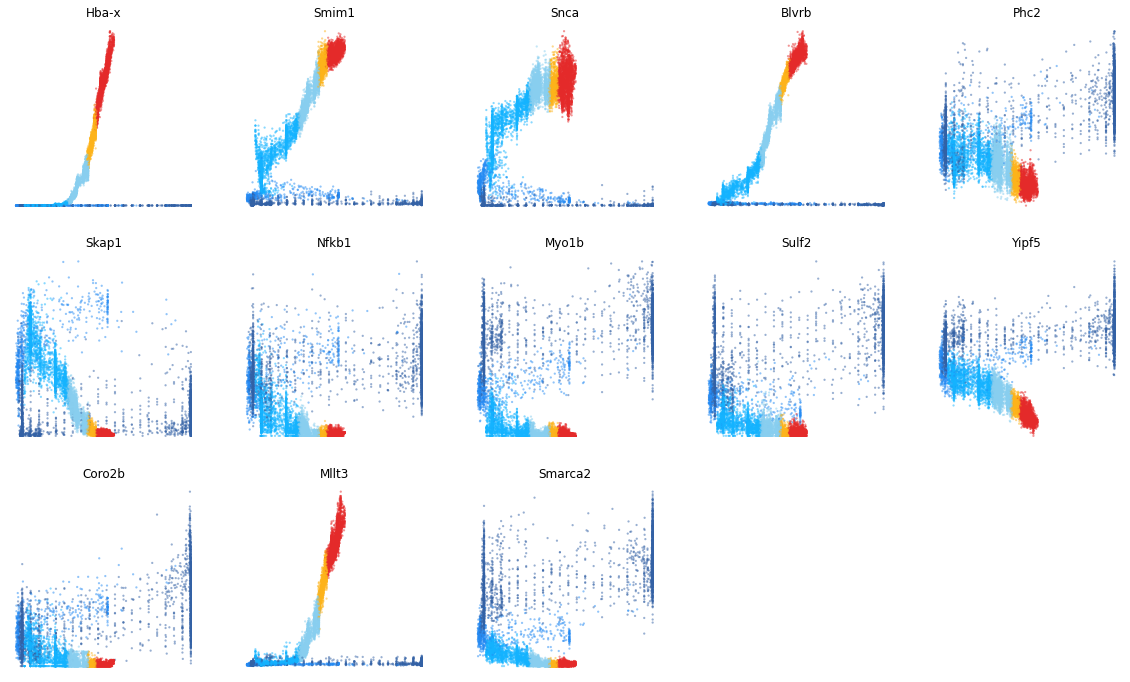

In [12]:
from plotting import colormap
ncols=5
fig = plt.figure(figsize=(20,12))

load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


In [13]:
load_cellDancer_TEST=load_cellDancer[load_cellDancer.clusters.isin(['Blood progenitors 2',
 'Blood progenitors 1',
 'Erythroid1',
 'Erythroid2',
 'Erythroid3'])]
load_cellDancer_TEST

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2,pseudotime
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN,0.083395
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN,0.083395
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,0.020687,0.043136,0.084950
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN,0.277028
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN,0.157050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN,0.486046
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN,0.517145
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN,0.484410
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN,0.482773


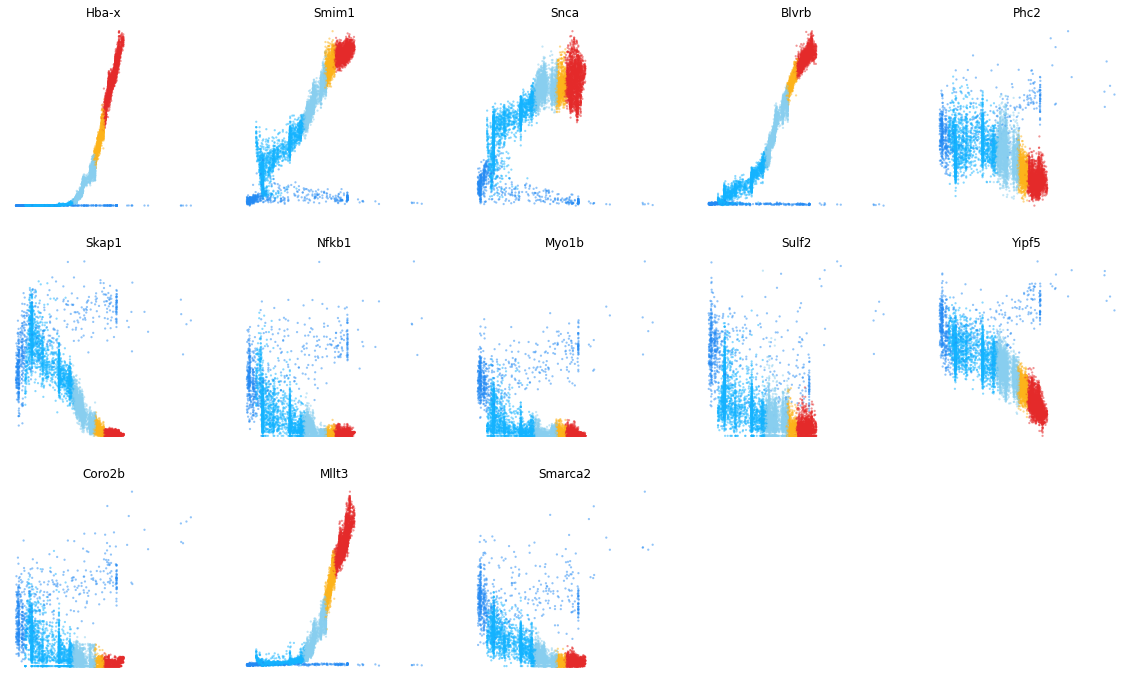

In [14]:
from plotting import colormap
ncols=5
fig = plt.figure(figsize=(20,12))
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']
import math
load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer_TEST,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [7]:
list(load_cellDancer.clusters.drop_duplicates())

['Blood progenitors 2',
 'Haematoendothelial progenitors',
 'Blood progenitors 1',
 'Erythroid1',
 'Erythroid2',
 'Erythroid3']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


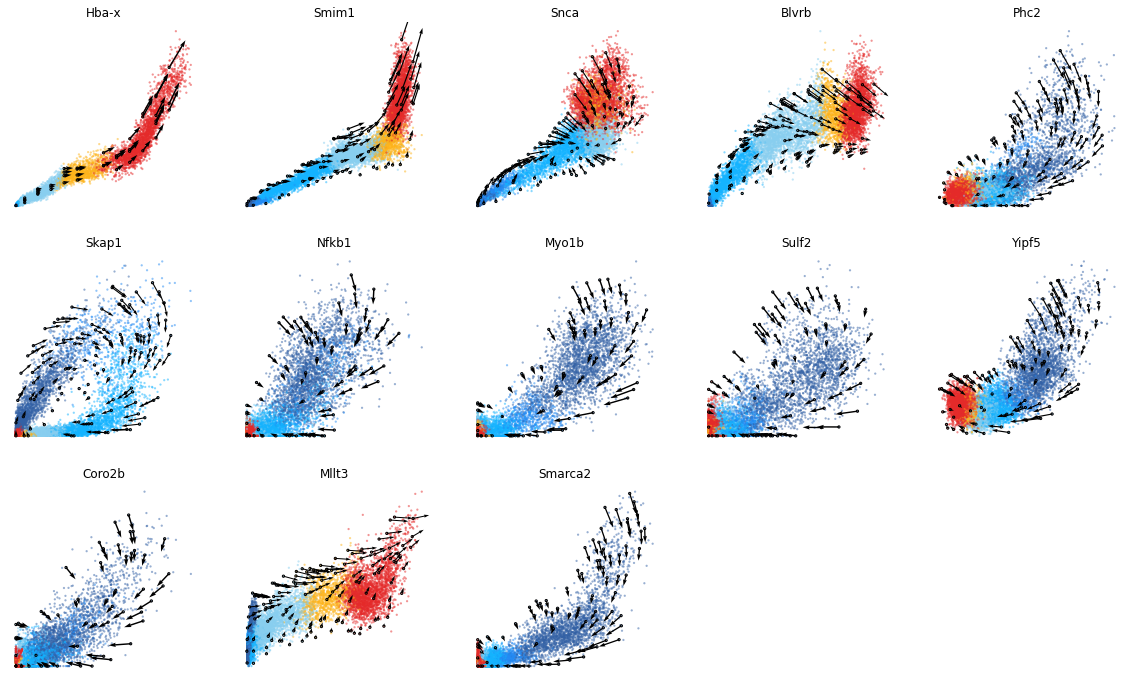

In [26]:
%load_ext autoreload
%autoreload 2

ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


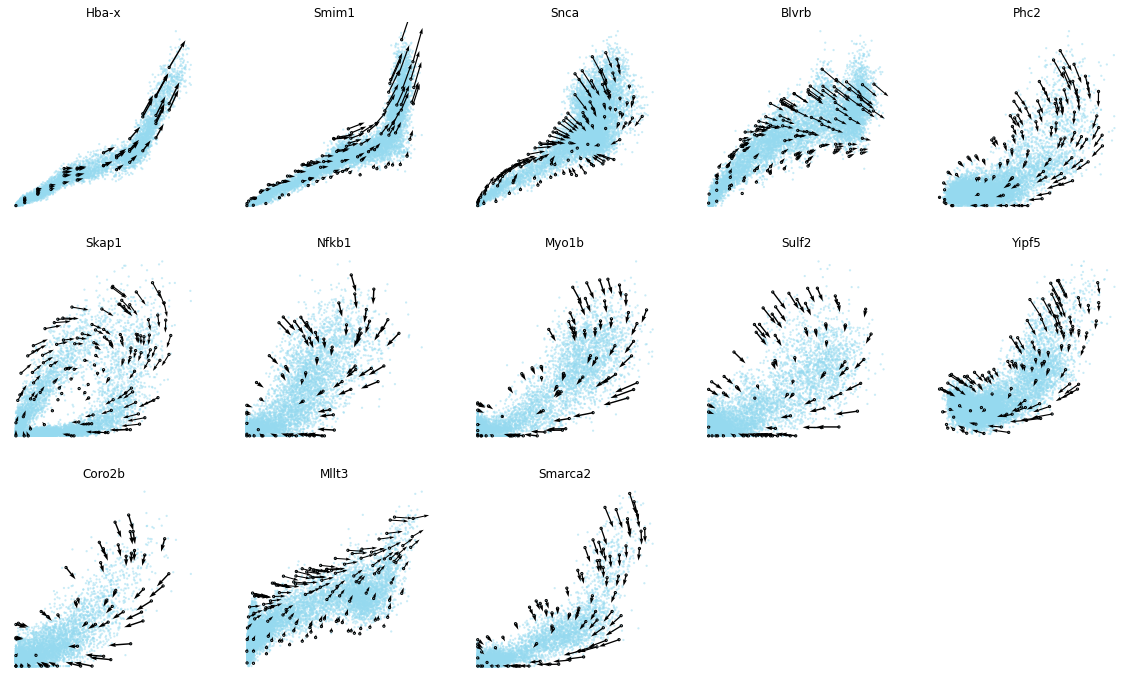

In [31]:
ncols=5
fig = plt.figure(figsize=(20,12))
gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2']

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=None,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


# Rsquare rank

In [33]:
%load_ext autoreload
%autoreload 2

from utilities import *

cluster_choice=['Blood progenitors 1','Blood progenitors 2','Erythroid1','Erythroid2','Erythroid3']
test=rank_rsquare(load_cellDancer,gene_list=gene_list,cluster_choice=cluster_choice)
test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculate rsquare: 100%|████████████████████████| 13/13 [00:06<00:00,  2.08it/s]


,gene_name,r_square
0,Hba-x,0.994224
1,Blvrb,0.993343
2,Mllt3,0.985881
3,Smim1,0.968150
4,Skap1,0.908306
5,Snca,0.902825
6,Myo1b,0.881352
7,Yipf5,0.837891
8,Smarca2,0.808610
9,Nfkb1,0.779519


# UMAP using alpha, beta, and gamma

In [17]:
alpha_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')
beta_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='beta')
gamma_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='gamma')
alpha_beta_gamma_df=pd.concat([alpha_df,beta_df,gamma_df],axis=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


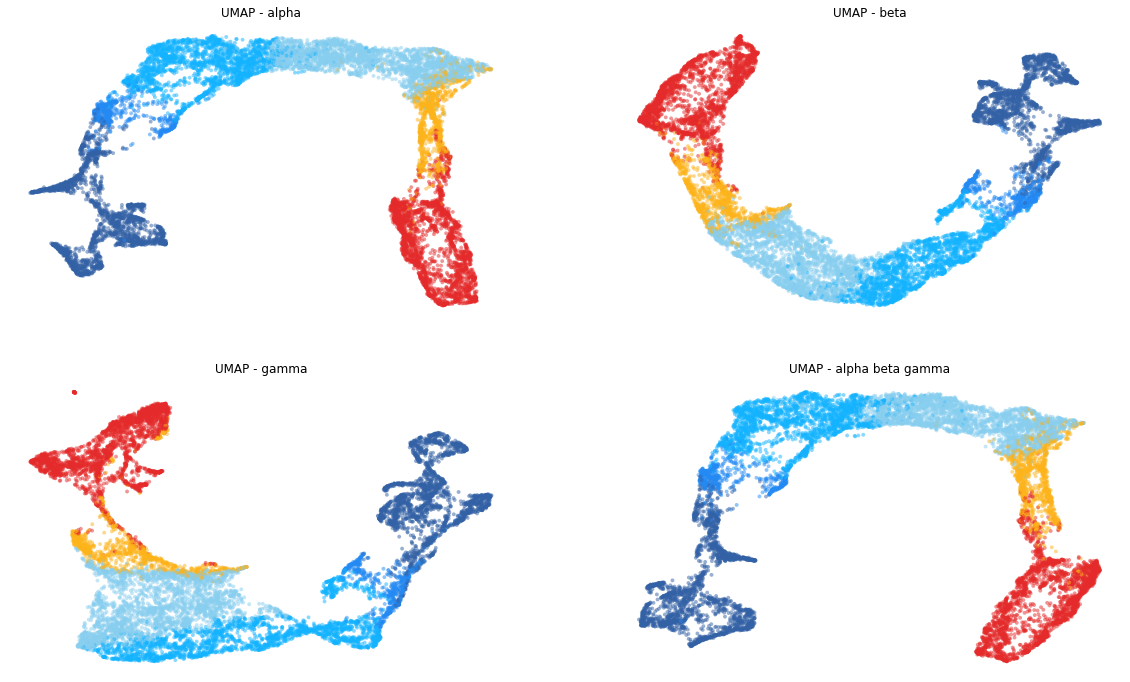

In [100]:
%load_ext autoreload
%autoreload 2

ncols=2
fig = plt.figure(figsize=(20,12))
para_df_list=[alpha_df,beta_df,gamma_df,alpha_beta_gamma_df]
para_name_list=['UMAP - alpha','UMAP - beta','UMAP - gamma','UMAP - alpha beta gamma']

cdplt.cell.plot_para_umap(ax,para_df_list[i],load_cellDancer,colormap=colormap.colormap_erythroid,title=para_name)

for para_name,i in zip(para_name_list,range(len(para_df_list))):
    ax = fig.add_subplot(math.ceil(len(para_df_list)/ncols), ncols, i+1)
    cdplt.cell.plot_para_umap(ax,para_df_list[i],load_cellDancer,colormap=colormap.colormap_erythroid,title=para_name)
    ax.set_title(para_name)
    ax.axis('off')

plt.show()

In [40]:
alpha,ax=plot_para_umap(ax,alpha_df,load_cellDancer,colormap=colormap_erythroid,title='alpha')

In [42]:
alpha_beta_gamma,ax=plot_para_umap(ax,alpha_beta_gamma_df,load_cellDancer,colormap=colormap_erythroid,title='abg')


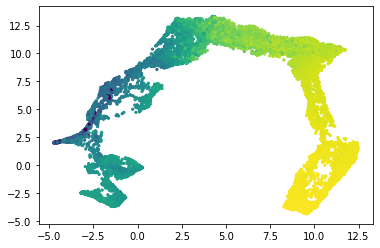

In [41]:
onegene=load_cellDancer[load_cellDancer.gene_name=='Hba-x'].reset_index(drop=True)
combined=pd.concat([alpha,onegene],axis=1)
import numpy as np
plt.scatter(combined.umap1,combined.umap2,c=np.log(combined.s0+0.0001),s=5)

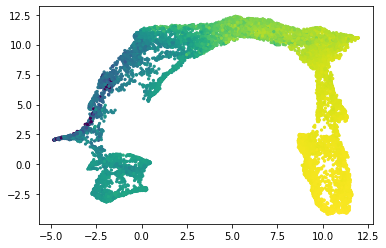

In [43]:
onegene=load_cellDancer[load_cellDancer.gene_name=='Hba-x'].reset_index(drop=True)
combined=pd.concat([alpha_beta_gamma,onegene],axis=1)
import numpy as np
plt.scatter(combined.umap1,combined.umap2,c=np.log(combined.s0+0.0001),s=5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


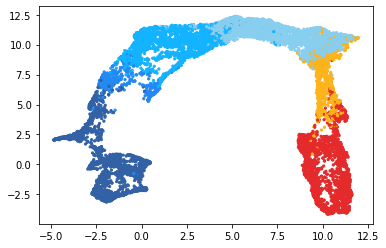

In [44]:
%load_ext autoreload
%autoreload 2
solarExtra02=['#3361A5',
 '#248AF3',
 '#14B3FF',
 '#88CEEF',
 '#FDB31A',
 '#E42A2A']
colormap_erythroid={
'Haematoendothelial progenitors':solarExtra02[0],
'Blood progenitors 1':solarExtra02[1],
'Blood progenitors 2':solarExtra02[2],
'Erythroid1':solarExtra02[3],
'Erythroid2':solarExtra02[4],
'Erythroid3':solarExtra02[5]}

colormap_1=colormap_erythroid
onegene_cluster_info=onegene.clusters
colors = list(map(lambda x: colormap_1.get(x, 'black'), onegene_cluster_info))

plt.scatter(combined.umap1,combined.umap2,c=colors,s=5)

0        Blood progenitors 2
1        Blood progenitors 2
2        Blood progenitors 2
3        Blood progenitors 2
4        Blood progenitors 2
                ...         
12324             Erythroid3
12325             Erythroid3
12326             Erythroid3
12327             Erythroid3
12328             Erythroid3
Name: clusters, Length: 12329, dtype: object

In [15]:
def plot_para_umap(ax,para_df,load_cellDancer,umap_n=25,colormap=None,save_path=None,title=None,legend_annotation=False):
    
    import umap
    # cellID = data_df.loc[data_df['gene_list']==gene]['cellID']
    # data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)
    # embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]
    
    def get_umap(df,n_neighbors=umap_n, min_dist=0.1, n_components=2, metric='euclidean'): 
        fit = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=n_components,
            metric=metric
        )
        embed = fit.fit_transform(df);
        return(embed)
    umap_para=get_umap(para_df)
    
    onegene_cluster_info=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]].clusters
    
    if colormap is None:
        colormap=build_colormap(onegene_cluster_info)
    
    colors = list(map(lambda x: colormap.get(x, 'black'), onegene_cluster_info))
    
    if legend_annotation:
        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colormap.values()]
        lgd=plt.legend(markers, colormap.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))

    ax.scatter(umap_para[:,0], umap_para[:,1],c=colors,s=15,alpha=0.5,edgecolor="none")
    

    if save_path is not None:
        plt.savefig(save_path,bbox_inches='tight',bbox_extra_artists=(lgd,))
    umap_df=pd.concat([pd.DataFrame({'umap1':umap_para[:,0],'umap2':umap_para[:,1]}),onegene_cluster_info],axis=1)
    return(umap_df,ax)